In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data=pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,...,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,...,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,...,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,...,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,...,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


Data Shape

In [3]:
data.shape

(205, 26)

Data Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Data Description

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,103.0000,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,59.3226,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,1.0000,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,52.0000,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,103.0000,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,154.0000,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,205.0000,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


In [6]:
data = data.drop('car_ID',axis=1)

Checking for Missing Values

In [7]:
df_na = data.isna().mean().round(4) * 100

df_na.sort_values(ascending=False).head()

symboling    0.0000
enginetype   0.0000
highwaympg   0.0000
citympg      0.0000
peakrpm      0.0000
dtype: float64

Displaying the data types of the dataset

In [8]:
data.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Checking for outliers

(205, 25)

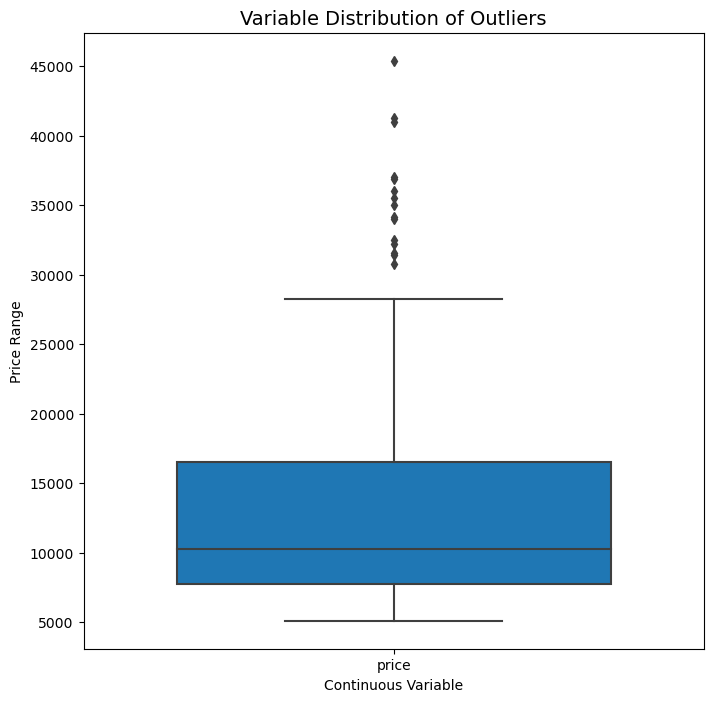

In [9]:
outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=data[outliers], orient="v", palette="tab10" ,whis=1.5,saturation=1, width=0.7)
plt.title("Variable Distribution of Outliers", fontsize = 14)
plt.ylabel("Price Range")
plt.xlabel("Continuous Variable")
data.shape


As we can see from the boxplot above there are some ranges of car prices that can be classified as outliers, mainly the ones over the 36K range. We chose to leave them for now and standarize the scaling rather than remove them. 

## Extracting the company from the car name

In [10]:
data['CarName'].isnull().sum()

0

In [11]:
data['CarName'] = data['CarName'].str.split(' ', expand = True)[0]

## Getting Unique Car Names

In [12]:
data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

From the result of the previous cell, it is evident that there are some duplicate car name such as:
- maxda and mazda,
- Nissan and nissan,
- porsche and porcshce,
- toyota and toyouta,
- vokswagen,volkswagen, and vw. 

These need to be renamed in order to get rid of the typos and have consistent naming amongst the dataset. 

In [13]:
data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

The process of "symboling" is when cars are given a risk factor symbol according to their price. The symbol is modified by moving it up or down the scale to determine if it is riskier or less risky. The value "-3"   implies that the car is risky, and "+3" indicates that the car is safe. 

Changing the data type of symboling is necessary because it is a categorical variable per the dictionary file.


In [14]:
data['symboling'] = data['symboling'].astype(str)

## Categorical columns

In [15]:
cat_cols=data.select_dtypes(include=['object']).columns

In [16]:
data[cat_cols].head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi


## Numerical columns 


In [17]:
num_cols=data.select_dtypes(exclude=['object']).columns

In [18]:
data[num_cols].head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000


## Checking the dataframe for duplicates

In [19]:
data.loc[data.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


## Visualizing the Different Cars

In [20]:
df=pd.DataFrame(data['CarName'].value_counts()).reset_index().rename(columns={'index':'car_name','CarName': 'count'})

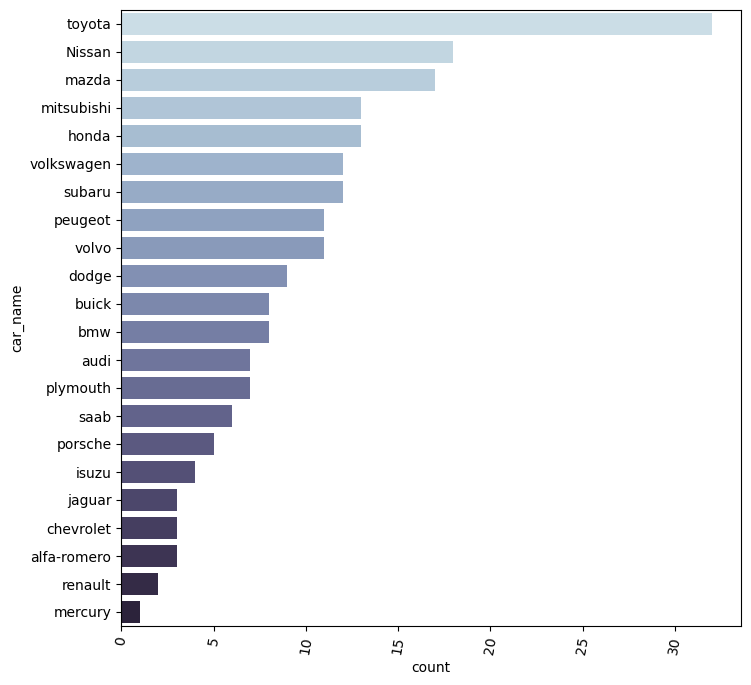

In [21]:
plot = sns.barplot(y='car_name',x='count' ,data=df, palette = "ch:s=.25,rot=-.25")
plot=plt.setp(plot.get_xticklabels(), rotation=80)

The plot brings the conclusion that the most popular car is Toyota, and the least suitable one is Mercury.

## Visualizing the Car Prices

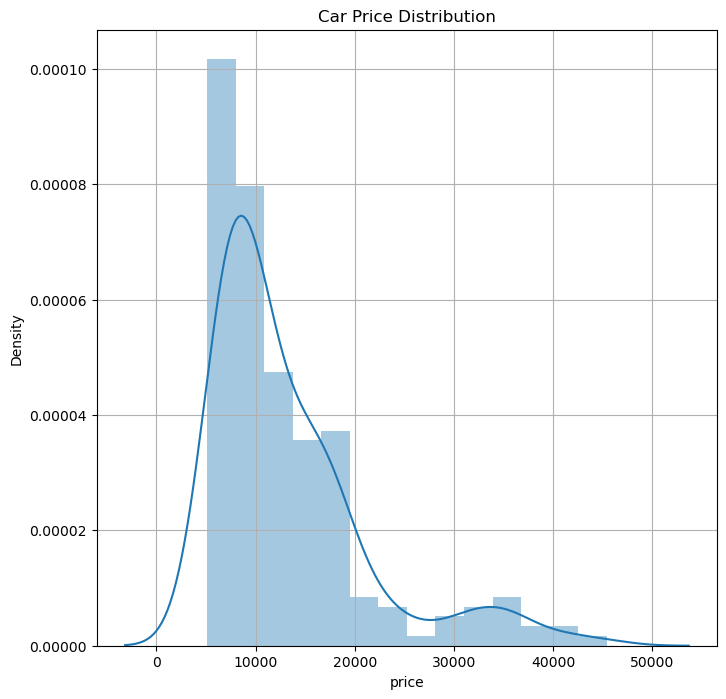

In [22]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution')
sns.distplot(data['price'])
plt.grid()

The price range of nearly all cars is less than 18.000, so the plot is skewed to the right.

## Relation of Features with Price

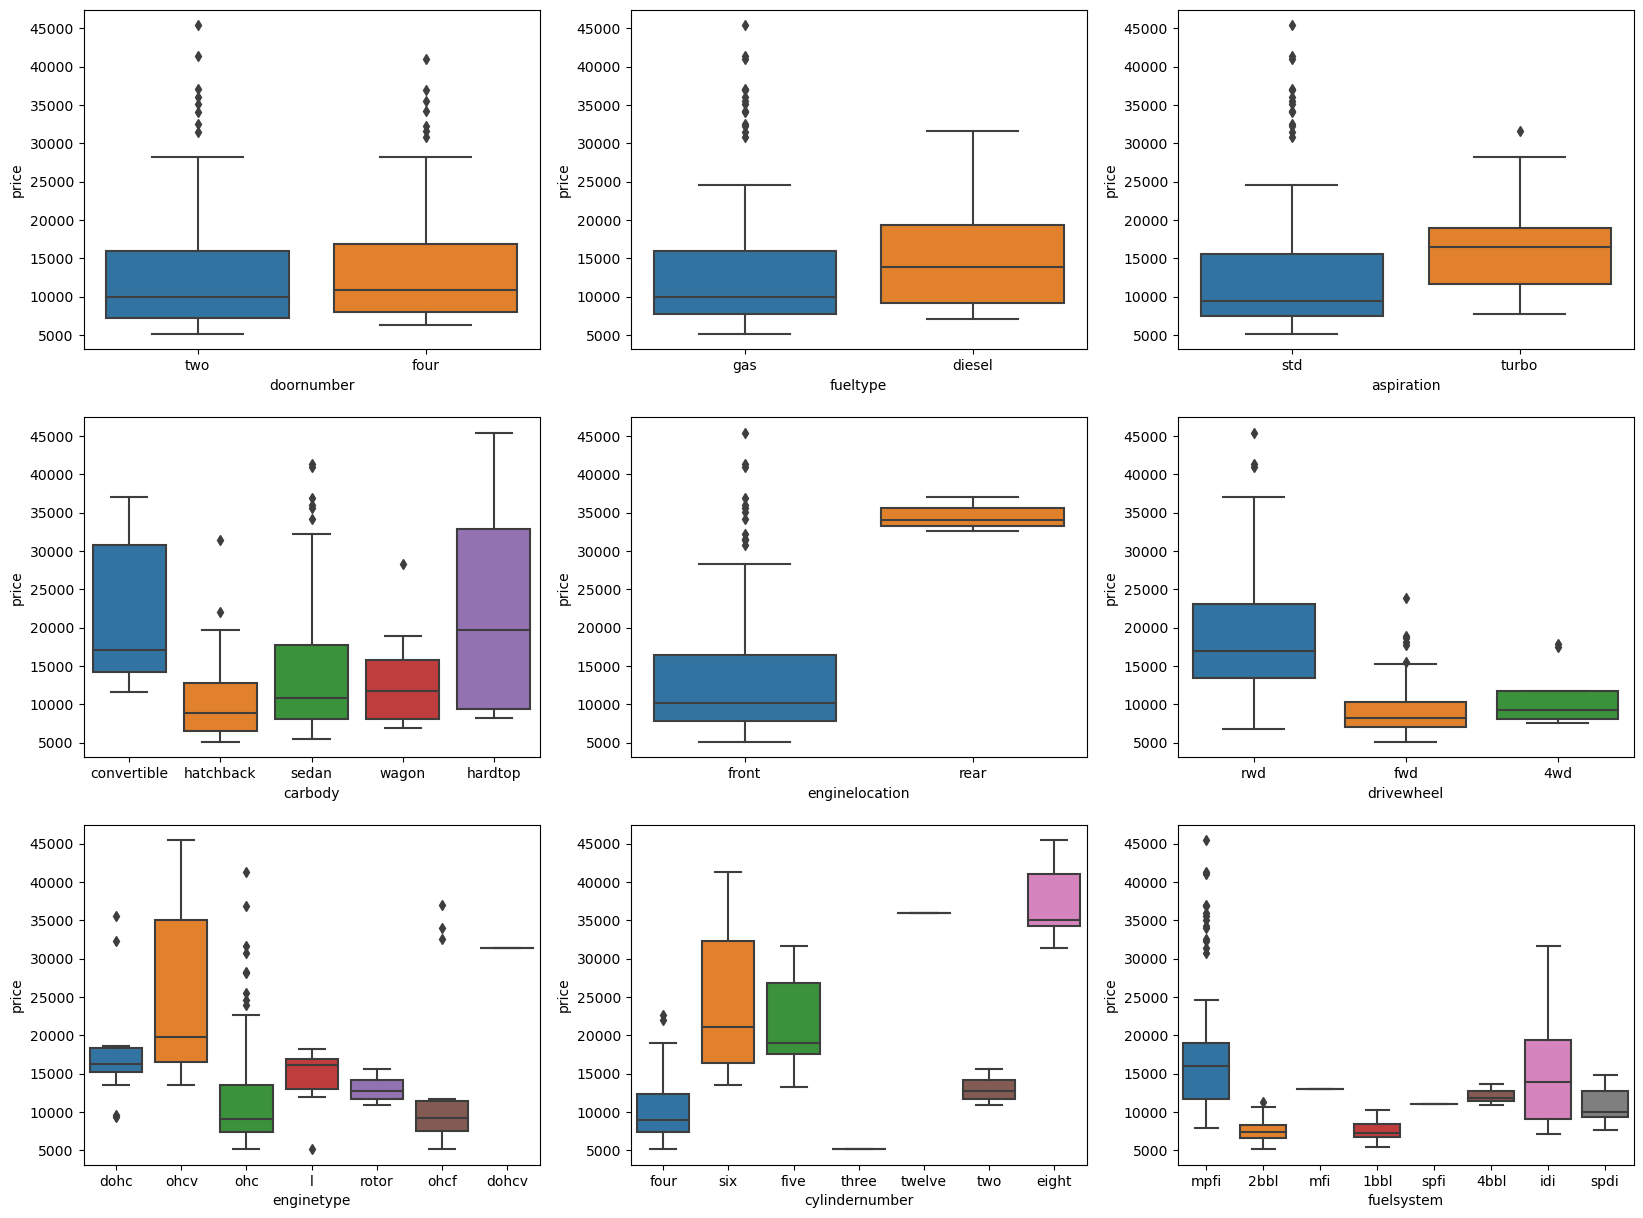

In [24]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = data)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = data)
plt.show()

#### Insights
- The cars with `fueltype` as `diesel` are comparatively expensive than the cars with `fueltype` as `gas`.
- All the types of carbody is relatively cheaper as compared to `convertible` carbody.
- The cars with `rear enginelocation` are way expensive than cars with `front enginelocation`.
- The price of car is directly proportional to `no. of cylinders` in most cases.
- Enginetype `ohcv` comes into higher price range cars.
- `DoorNumber` isn't affecting the price much.
- HigerEnd cars seems to have `rwd` drivewheel

- When the 'fueltype' is `diesel`, cars are more expensive compared to cars which `fueltype` is `gas`. 
- `Convertible` car body is more expansive than other types of the car body.
- The cars with `rear enginelocation` are more expensive than cars with `front enginelocation`.
- The cost of the car is directly proportional to `no. of cylinders` in the majority.
- Cars with higher cost have Enginetype `ohcv`.  
- The price of the car is not influenced by `DoorNumber`.
- HigerEnd cars appear to have `rwd` drivewheel.
- The expense of -1 symboling is increased in comparison to others.
- When comparing the cost of the `turbo` with `std`, we can see that `turbo` is higher almost everywhere, though there are some outliers in the `std` price.
- Though there exist some outliers, `diesel` is more expensive than `gas`.
- The price of the `hardtop` car body is very high compared to the rest.
- The price range of `rwd` drivewheel cars is particularly higher compared to the rest.
- The price range of `ohcv` engine cars is particularly higher  compared to the rest.
- Cylinder numbers `3` and `12` exist only in one car. 
- A car with cylinder number `8` has a higher price range
- Cars with `idi` fuel system are in a higher price range.

### Visualizing Frequency

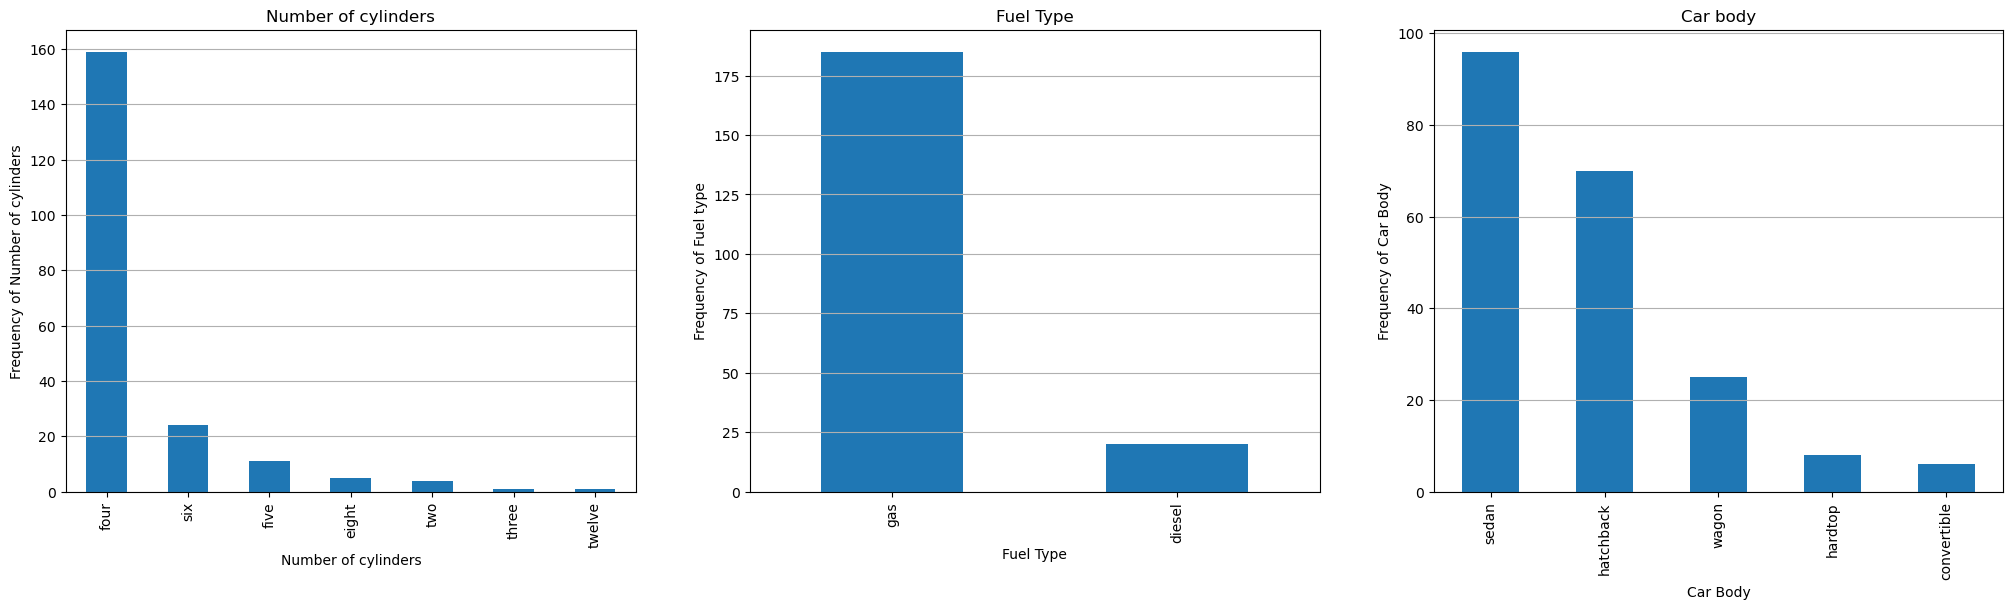

In [25]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = data['cylindernumber'].value_counts().plot(kind ='bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')
plt.grid(axis = 'y')

plt.subplot(1,3,2)
plt1 = data['fueltype'].value_counts().plot(kind ='bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')
plt.grid(axis = 'y')

plt.subplot(1,3,3)
plt1 = data['carbody'].value_counts().plot(kind ='bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')
plt.grid(axis = 'y')

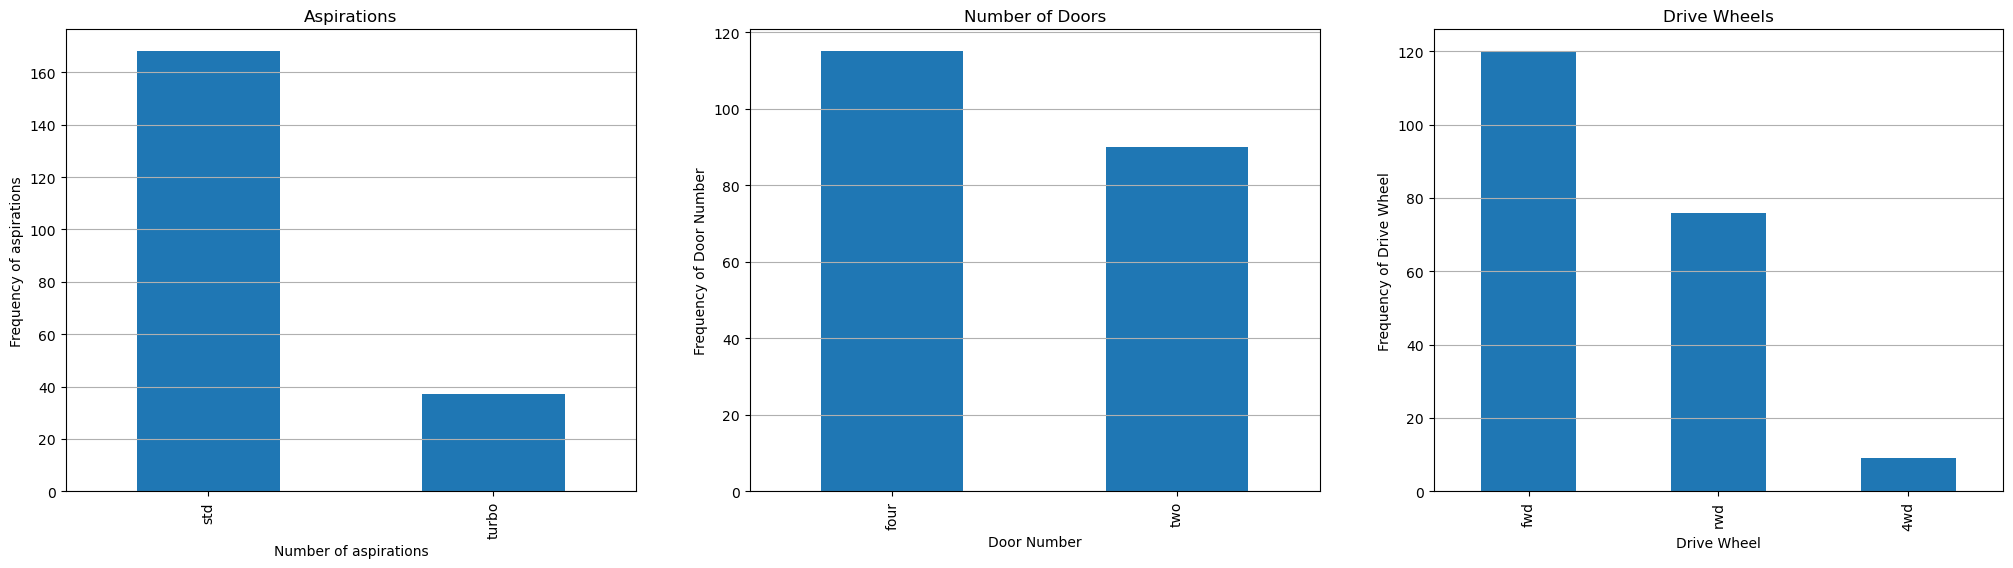

In [26]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = data['aspiration'].value_counts().plot(kind ='bar')
plt.title('Aspirations')
plt1.set(xlabel = 'Number of aspirations', ylabel='Frequency of aspirations')
plt.grid(axis = 'y')

plt.subplot(1,3,2)
plt1 = data['doornumber'].value_counts().plot(kind ='bar')
plt.title('Number of Doors')
plt1.set(xlabel = 'Door Number', ylabel='Frequency of Door Number')
plt.grid(axis = 'y')

plt.subplot(1,3,3)
plt1 = data['drivewheel'].value_counts().plot(kind ='bar')
plt.title('Drive Wheels')
plt1.set(xlabel = 'Drive Wheel', ylabel='Frequency of Drive Wheel')
plt.grid(axis = 'y')

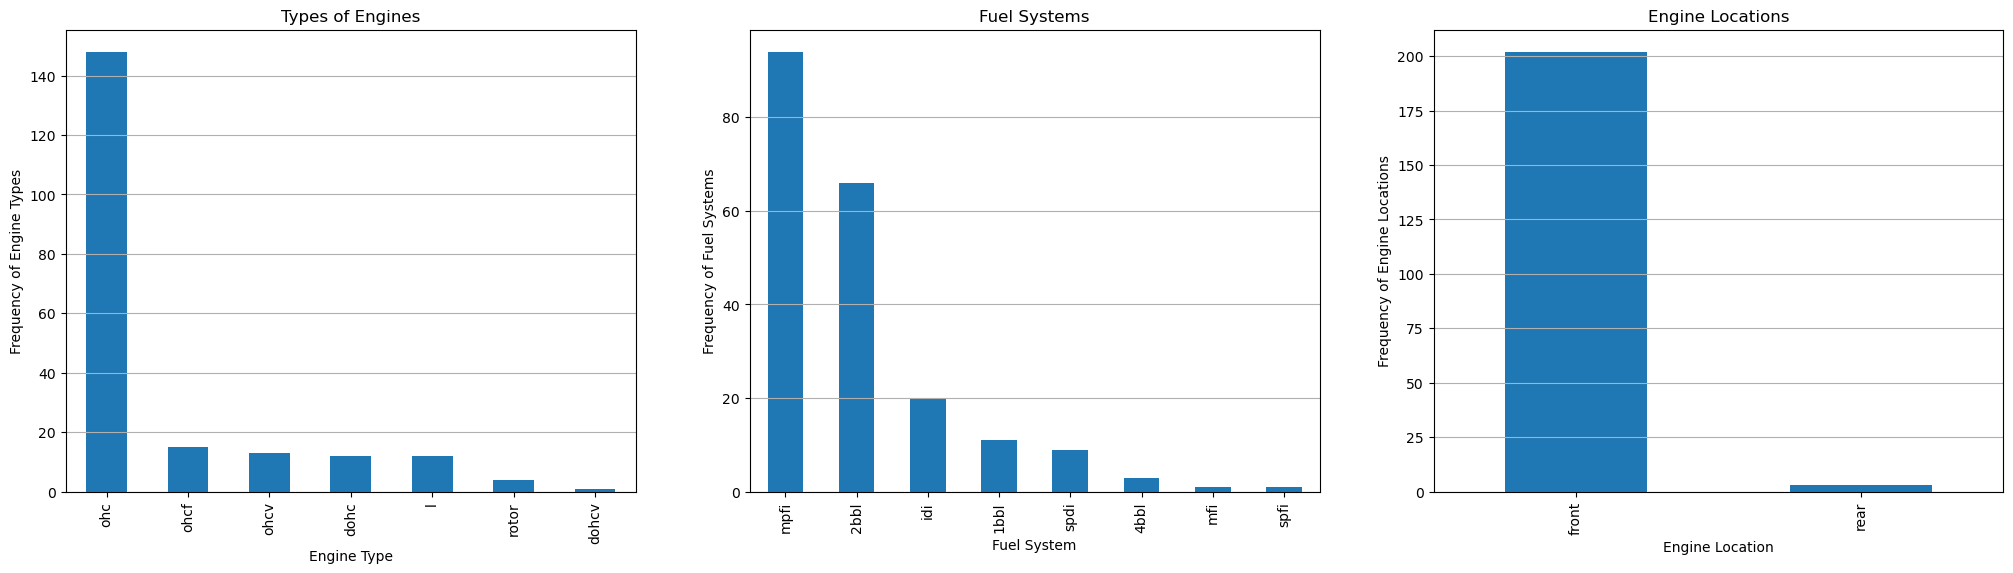

In [27]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = data['enginetype'].value_counts().plot(kind ='bar')
plt.title('Types of Engines')
plt1.set(xlabel = 'Engine Type', ylabel='Frequency of Engine Types')
plt.grid(axis = 'y')

plt.subplot(1,3,2)
plt1 = data['fuelsystem'].value_counts().plot(kind ='bar')
plt.title('Fuel Systems')
plt1.set(xlabel = 'Fuel System', ylabel='Frequency of Fuel Systems')
plt.grid(axis = 'y')

plt.subplot(1,3,3)
plt1 = data['enginelocation'].value_counts().plot(kind ='bar')
plt.title('Engine Locations')
plt1.set(xlabel = 'Engine Location', ylabel='Frequency of Engine Locations')
plt.grid(axis = 'y')

In [28]:
df=pd.DataFrame(data['symboling'].value_counts()).reset_index().rename(columns={'index':'symboling','symboling':'count'})

<AxesSubplot:xlabel='symboling', ylabel='count'>

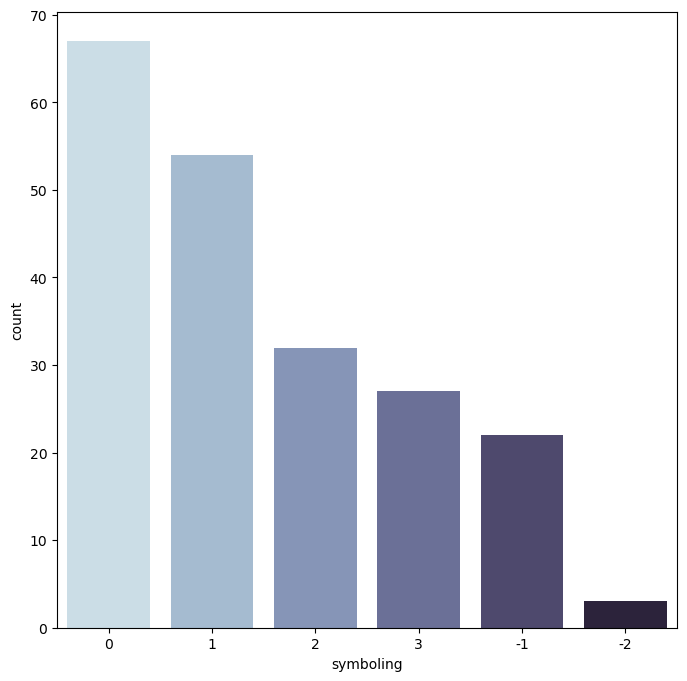

In [29]:
sns.barplot(x='symboling',y='count',data=df, palette = "ch:s=.25,rot=-.25")

Most of the car symboling values are 0. 

### Price distribution according to symboling 

<AxesSubplot:xlabel='symboling', ylabel='price'>

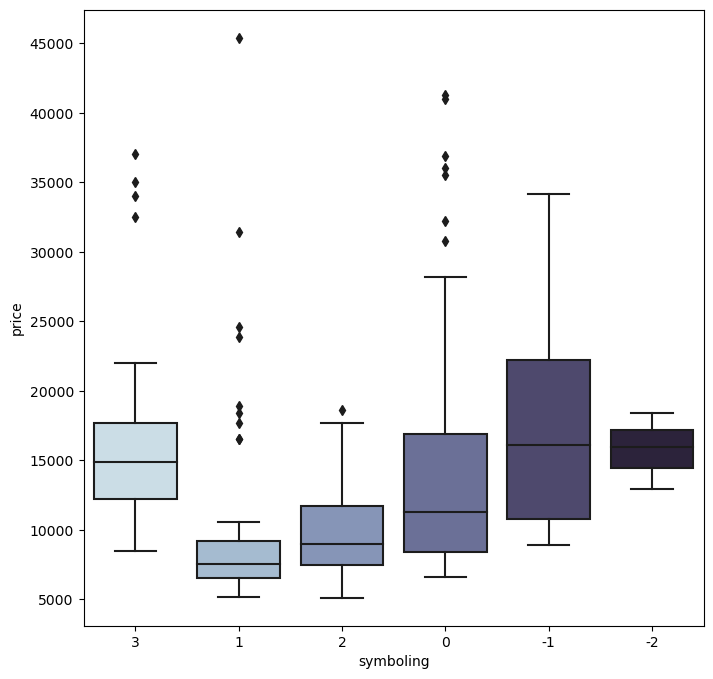

In [30]:
sns.boxplot(x = 'symboling', y = 'price', data = data,palette="ch:s=.25,rot=-.25")

## Comparison of Wheel base with Price


<AxesSubplot:xlabel='wheelbase', ylabel='price'>

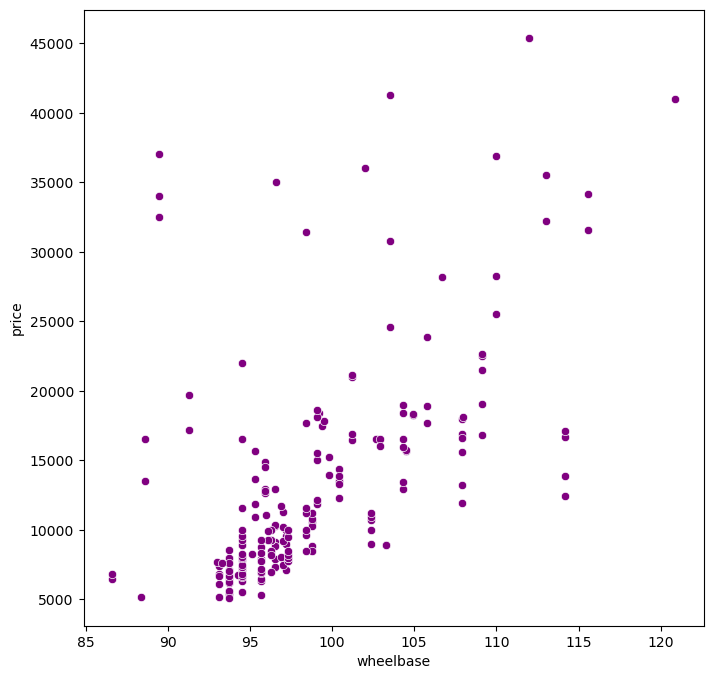

In [31]:
sns.scatterplot(x="wheelbase", y="price", data=data,color='purple')

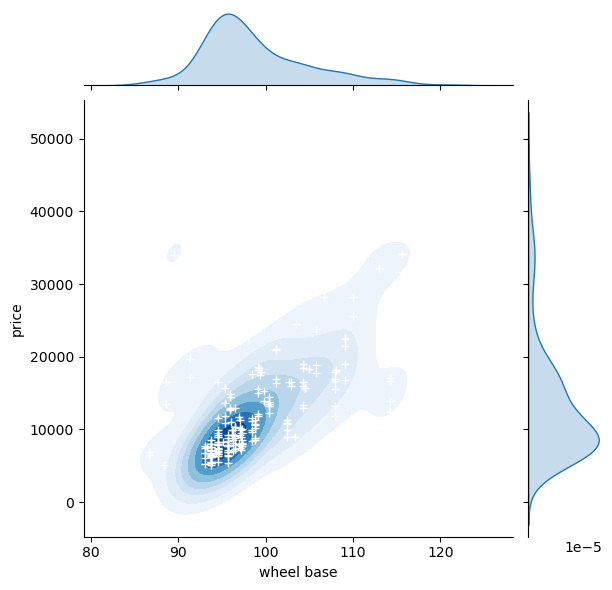

In [32]:
g = sns.jointplot(x="wheelbase", y="price", data=data, kind="kde", fill = True, thresh = 0, cmap='Blues')
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("wheel base", "price");

* The points are very scattered.

## Comparison of Carlength with Car price

<AxesSubplot:xlabel='carlength', ylabel='price'>

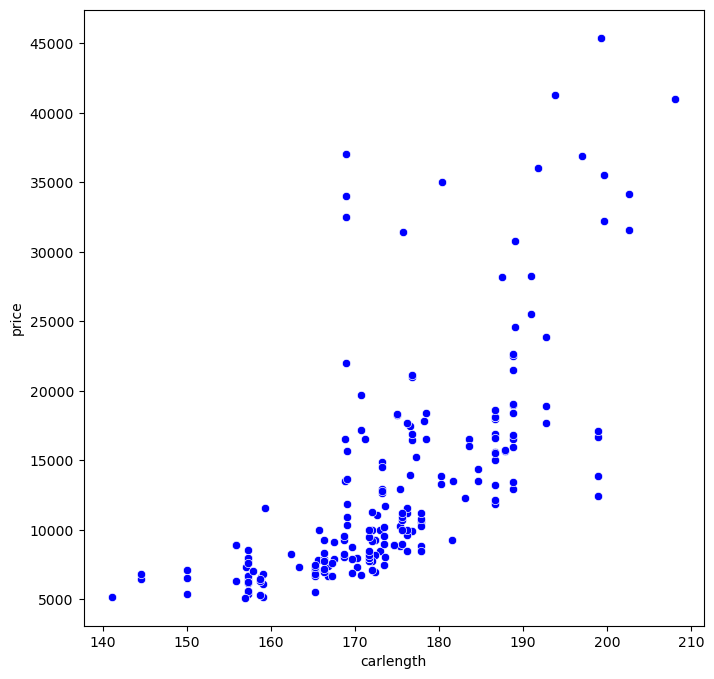

In [33]:
sns.scatterplot(x="carlength", y="price", data=data,color='b')

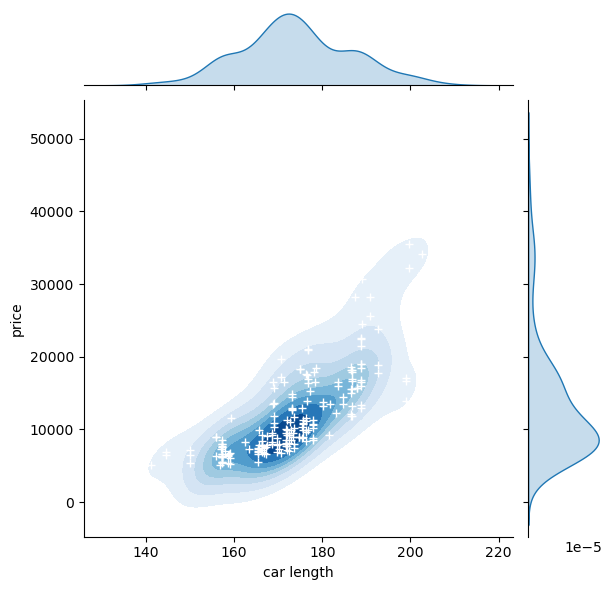

In [34]:
g = sns.jointplot(x="carlength", y="price", data=data, kind="kde", fill = True, thresh = 0, cmap='Blues')
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car length", "price");

* The car length is not as scattered as wheelbase but still very scattered.

## Comparison of Car width with Price

<AxesSubplot:xlabel='carwidth', ylabel='price'>

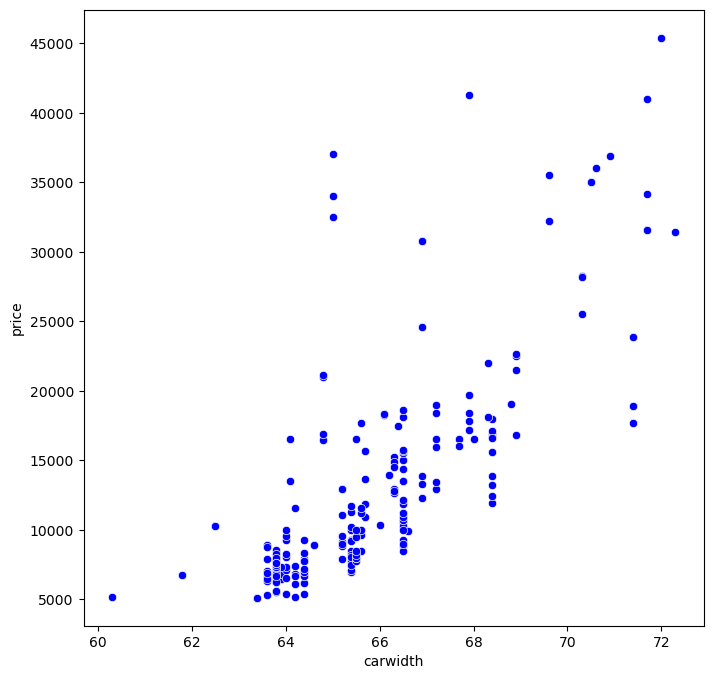

In [35]:
sns.scatterplot(x="carwidth", y="price", data=data,color='b')

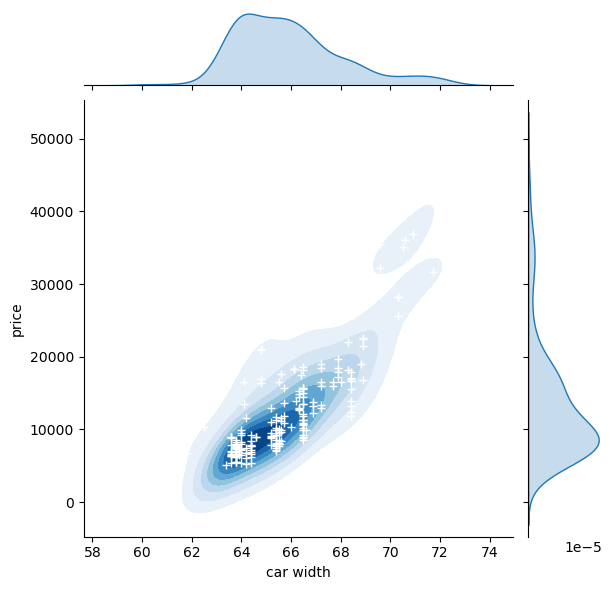

In [36]:
g = sns.jointplot(x="carwidth", y="price", data=data, kind="kde",fill = True, thresh = 0, cmap='Blues')
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "price");

## Comparison of  Car length with Car width

<AxesSubplot:xlabel='carlength', ylabel='carwidth'>

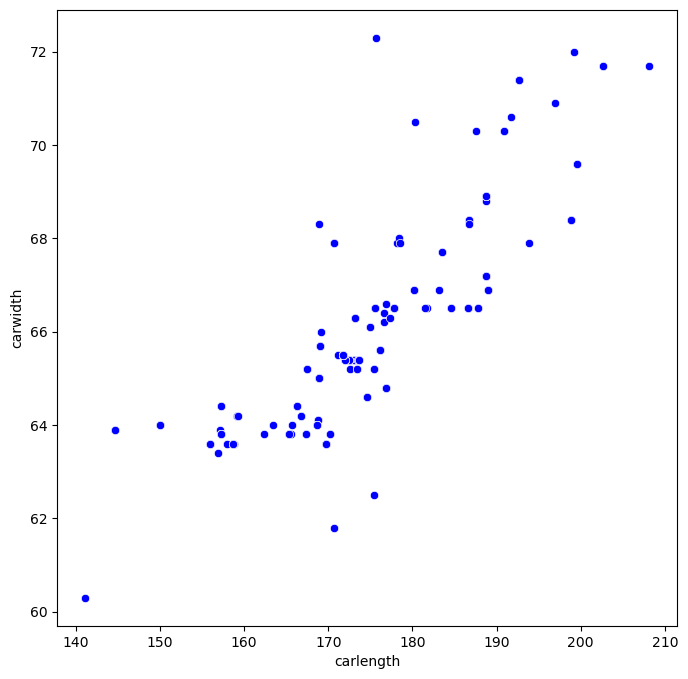

In [37]:
sns.scatterplot(x="carlength", y="carwidth", data=data,color='b')

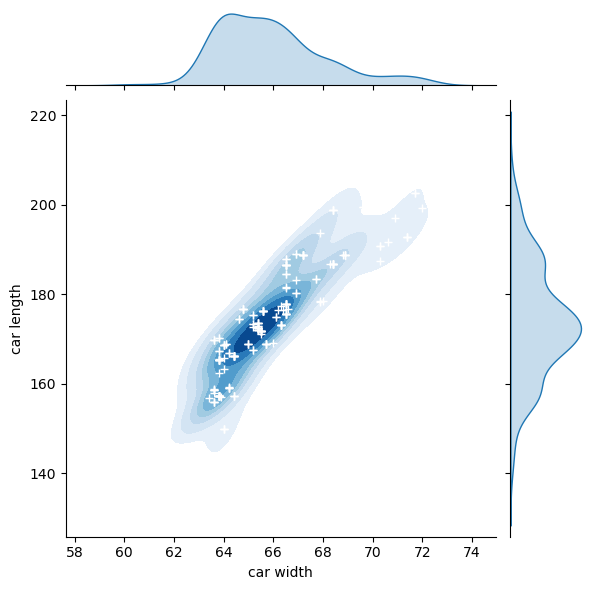

In [38]:
g = sns.jointplot(x="carwidth", y="carlength", data=data, kind="kde", fill = True, thresh = 0, cmap='Blues')
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "car length");

* There seems to be a strong relation is between car length and car width. 

## Comparison of Curbweight with Price

<AxesSubplot:xlabel='curbweight', ylabel='price'>

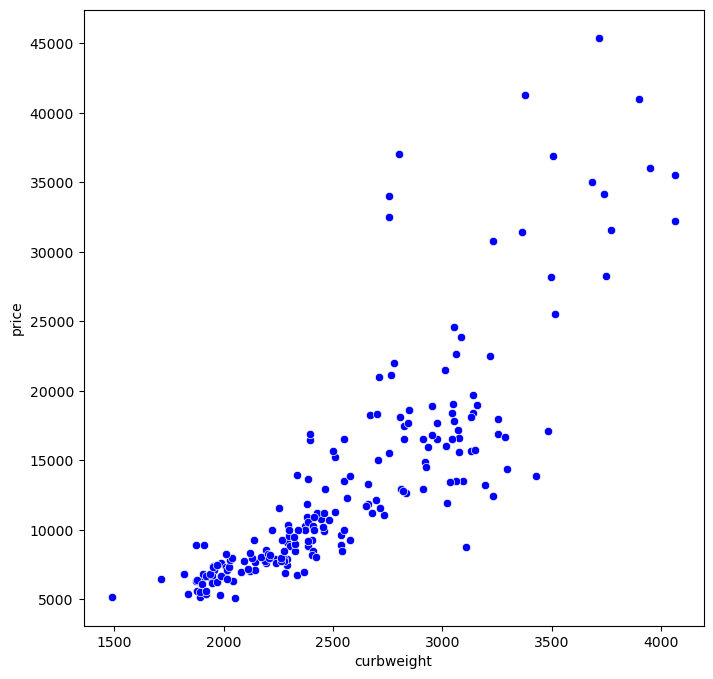

In [39]:
sns.scatterplot(x="curbweight", y="price", data=data,color='b')

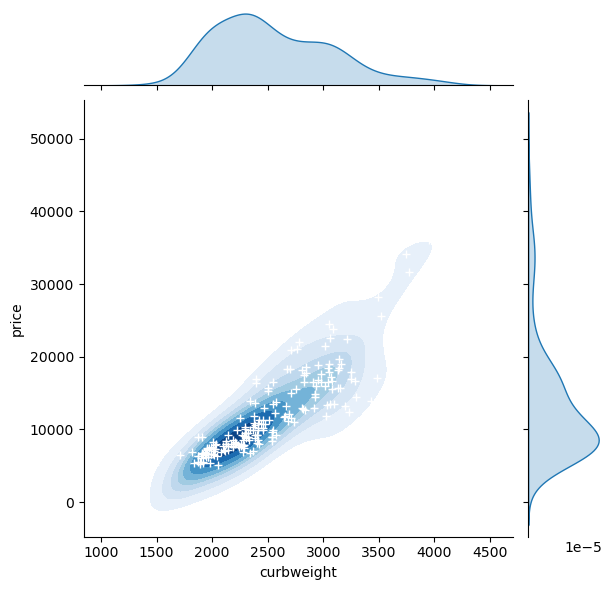

In [40]:
g = sns.jointplot(x="curbweight", y="price", data=data, kind="kde",fill = True, thresh = 0, cmap='Blues')
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("curbweight", "price");

* After around 3000 the points become scattered despite the initial increase.

## Comparison of  Engine size with Price

<AxesSubplot:xlabel='enginesize', ylabel='price'>

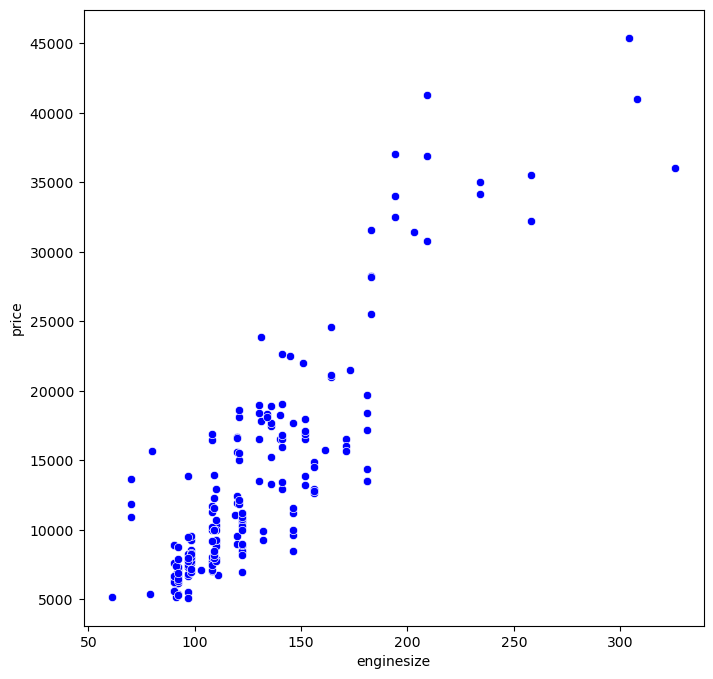

In [41]:
sns.scatterplot(x="enginesize", y="price", data=data,color='b')

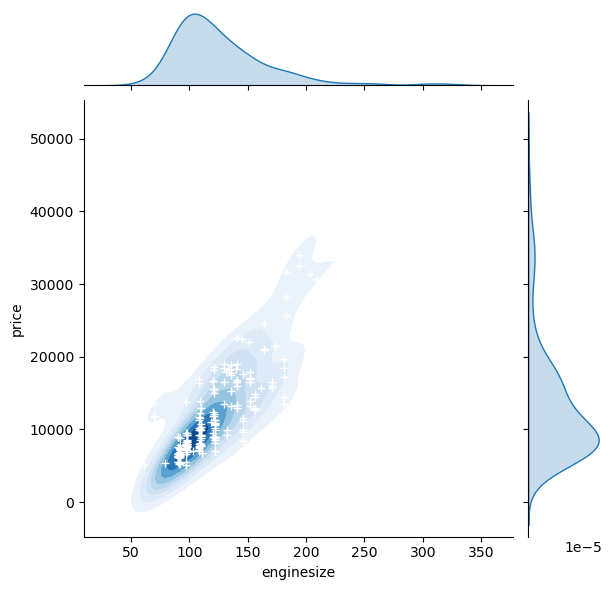

In [42]:
g = sns.jointplot(x="enginesize", y="price", data=data, kind="kde", fill = True, thresh = 0, cmap='Blues')
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("enginesize", "price");

* After around 150 the points become scattered despite the initial increase.

## Comparison of Boreratio with Price

<AxesSubplot:xlabel='boreratio', ylabel='price'>

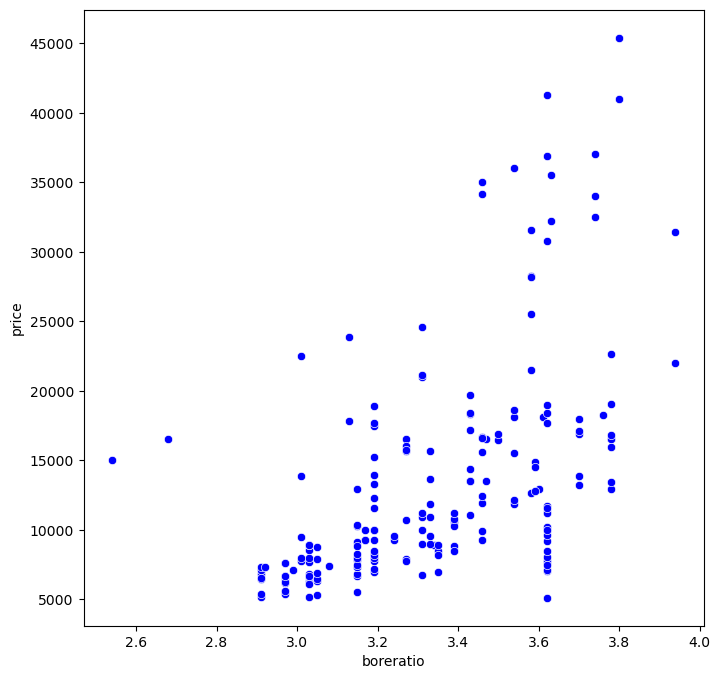

In [43]:
sns.scatterplot(x="boreratio", y="price", data=data,color='b')

## Comparison of  Stroke with price

<AxesSubplot:xlabel='stroke', ylabel='price'>

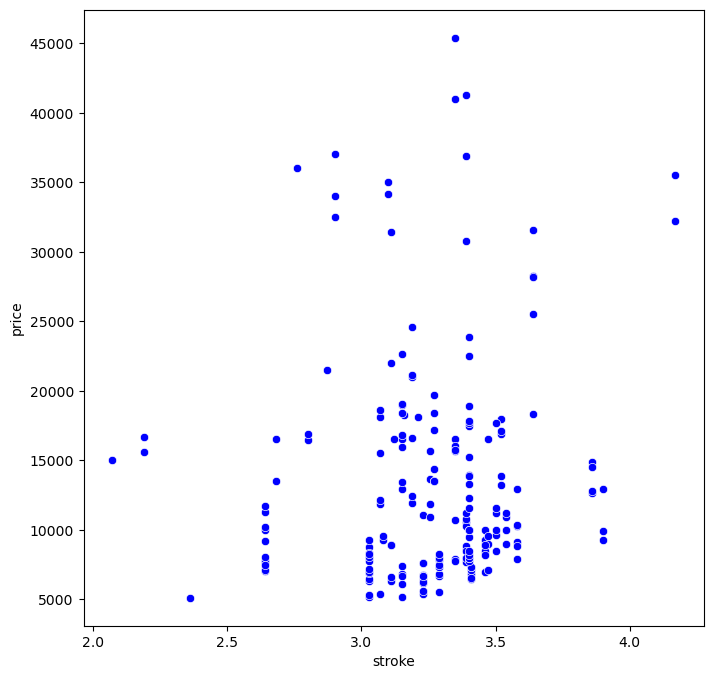

In [44]:
sns.scatterplot(x="stroke", y="price", data=data,color='b')

* There seems to be a very slight correlation between the stroke and price.

## Comparison of  Compression ratio with Price

<AxesSubplot:xlabel='compressionratio', ylabel='price'>

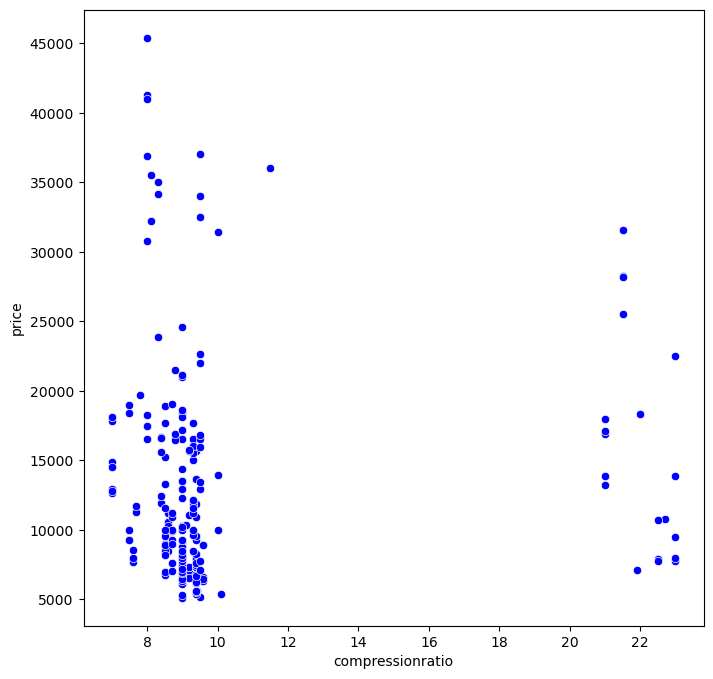

In [45]:
sns.scatterplot(x="compressionratio", y="price", data=data,color='b')

* There is no relation between the compression ratio and the price.

## Comparison of Horsepower with Price

<AxesSubplot:xlabel='horsepower', ylabel='price'>

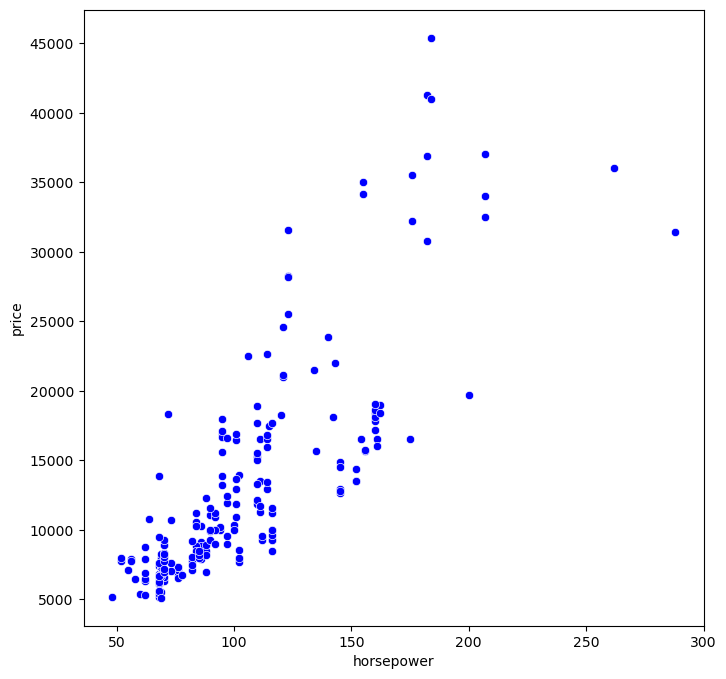

In [46]:
sns.scatterplot(x="horsepower", y="price", data=data,color='b')

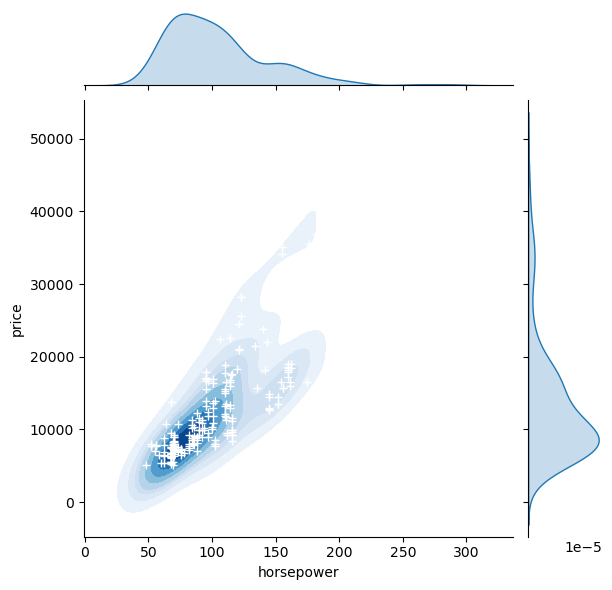

In [47]:
g = sns.jointplot(x="horsepower", y="price", data=data, kind="kde", fill = True, thresh = 0, cmap='Blues')
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("horsepower", "price");

## Comparison of Peakrpm with price

<AxesSubplot:xlabel='peakrpm', ylabel='price'>

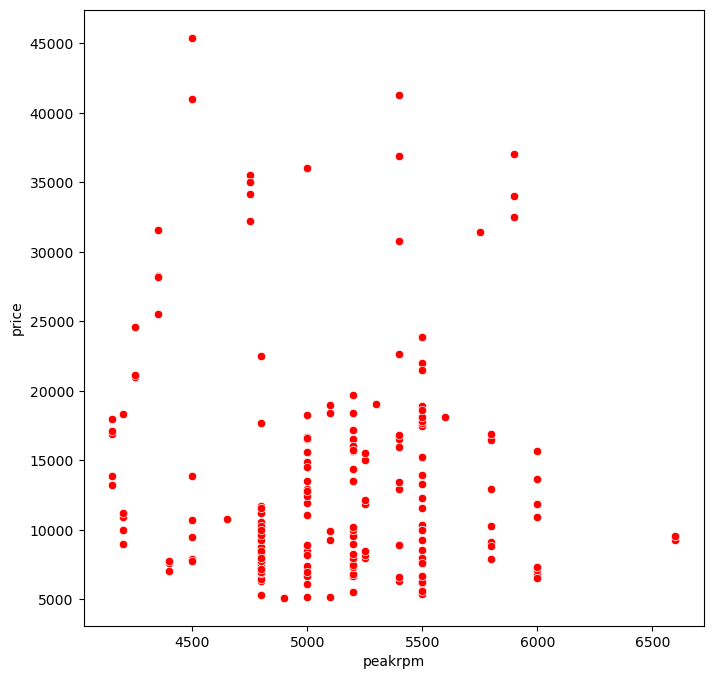

In [48]:
sns.scatterplot(x="peakrpm", y="price", data=data,color='r')

* There is no correlation between peakrpm and price.

## Comparison of Citympg with Price

<AxesSubplot:xlabel='citympg', ylabel='price'>

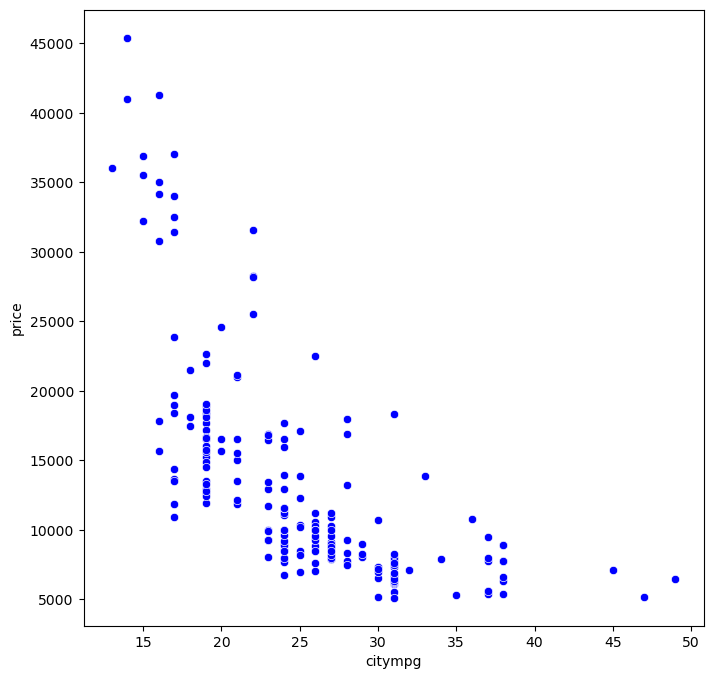

In [49]:
sns.scatterplot(x="citympg", y="price", data=data,color='b')

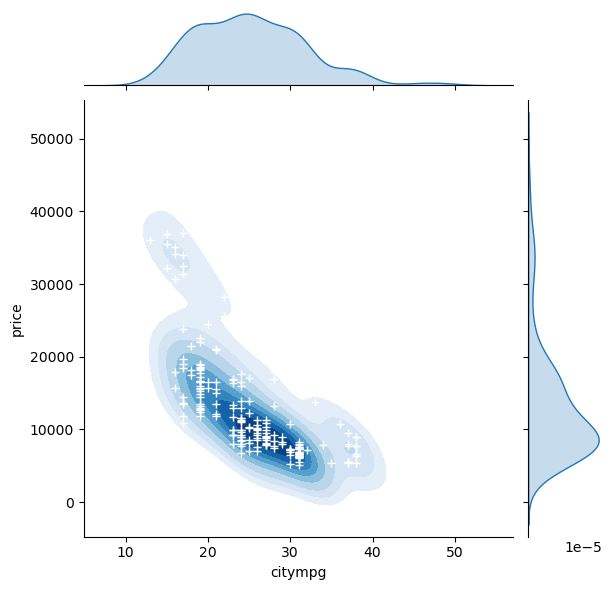

In [50]:
g = sns.jointplot(x="citympg", y="price", data=data, kind="kde", fill = True, thresh = 0, cmap='Blues')
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("citympg", "price");

* There is a negative correlation between citympg and price.

## Comparison of Highwaympg with Price

<AxesSubplot:xlabel='highwaympg', ylabel='price'>

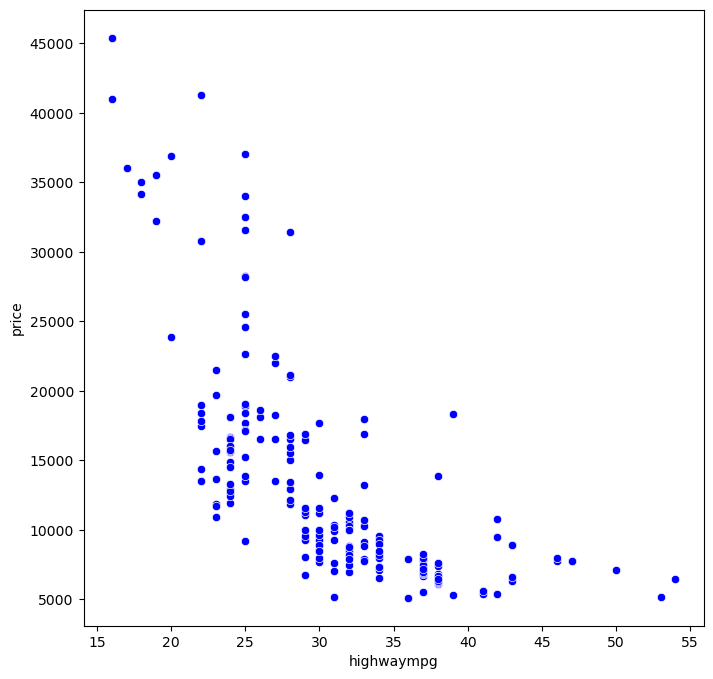

In [51]:
sns.scatterplot(x="highwaympg", y="price", data=data,color='b')

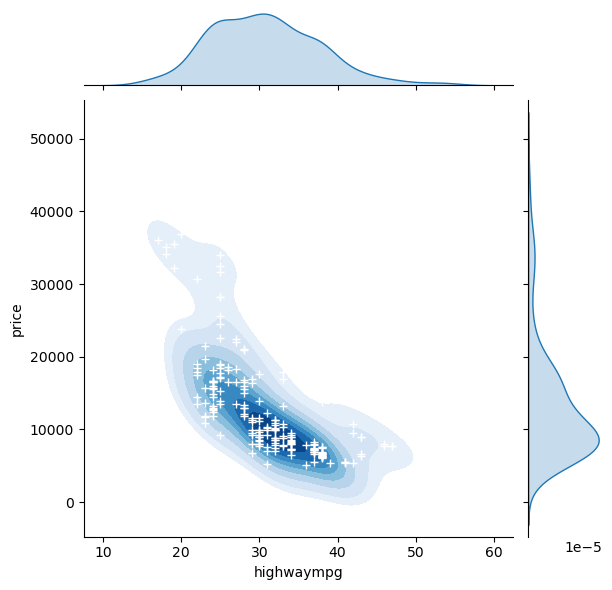

In [52]:
g = sns.jointplot(x="highwaympg", y="price", data=data, kind="kde", fill = True, thresh = 0, cmap='Blues')
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("highwaympg", "price");

* There is a negative correlation between highwaympg and price.

In [53]:
data[num_cols].corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.0000,0.8746,0.7951,0.5894,0.7764,0.5693,0.4887,0.1610,0.2498,0.3533,-0.3605,-0.4704,-0.5441,0.5778
carlength,0.8746,1.0000,0.8411,0.4910,0.8777,0.6834,0.6065,0.1295,0.1584,0.5526,-0.2872,-0.6709,-0.7047,0.6829
carwidth,0.7951,0.8411,1.0000,0.2792,0.8670,0.7354,0.5591,0.1829,0.1811,0.6407,-0.2200,-0.6427,-0.6772,0.7593
carheight,0.5894,0.4910,0.2792,1.0000,0.2956,0.0671,0.1711,-0.0553,0.2612,-0.1088,-0.3204,-0.0486,-0.1074,0.1193
curbweight,0.7764,0.8777,0.8670,0.2956,1.0000,0.8506,0.6485,0.1688,0.1514,0.7507,-0.2662,-0.7574,-0.7975,0.8353
enginesize,0.5693,0.6834,0.7354,0.0671,0.8506,1.0000,0.5838,0.2031,0.0290,0.8098,-0.2447,-0.6537,-0.6775,0.8741
boreratio,0.4887,0.6065,0.5591,0.1711,0.6485,0.5838,1.0000,-0.0559,0.0052,0.5737,-0.2550,-0.5845,-0.5870,0.5532
stroke,0.1610,0.1295,0.1829,-0.0553,0.1688,0.2031,-0.0559,1.0000,0.1861,0.0809,-0.0680,-0.0421,-0.0439,0.0794
compressionratio,0.2498,0.1584,0.1811,0.2612,0.1514,0.0290,0.0052,0.1861,1.0000,-0.2043,-0.4357,0.3247,0.2652,0.0680
horsepower,0.3533,0.5526,0.6407,-0.1088,0.7507,0.8098,0.5737,0.0809,-0.2043,1.0000,0.1311,-0.8015,-0.7705,0.8081


<AxesSubplot:>

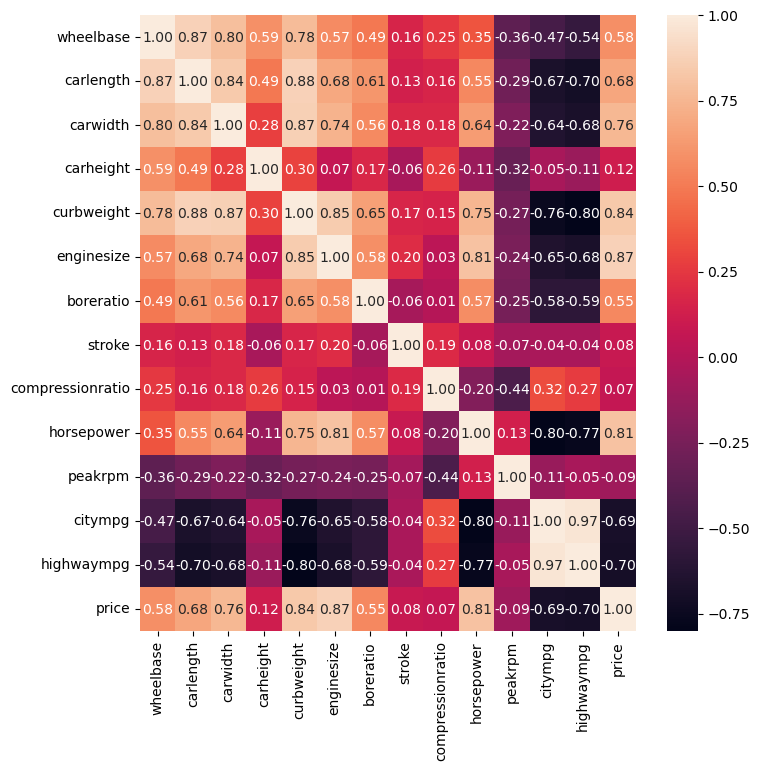

In [54]:
sns.heatmap(data[num_cols].corr(), annot=True, fmt='.2f')

Insights:
* wheelbase has high positive correlation with carlength,carwidth and curbweight	
* carlength has high postive correlation with curbweight
* carlength has negative correlation with highwaympg 
* carwidth has high postive correlation with curbweight and engine size
* enginesize has high positive correlation with horsepower
* curbweight has high positive correlation with engine size and horse power, negative correlation with highwaympg
* horsepower has negative correlation with citympg and highwaympg
* citympg and highwaympg are highly correlated 


# Feature Selection 

In [55]:
X=data[num_cols].drop('price',axis=1)
y=data['price']

In [56]:
X = data.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X=X.drop(['CarName','price'],axis=1)
y=data['price']

In [57]:
clf_rf_3 = GradientBoostingRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])


Chosen best 15 feature by rfe: Index(['aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength',
       'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


In [58]:
features=list(X.columns[rfe.support_])

# Training

In [59]:
x = X[features]
y = data.price
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

In [62]:
GB = GradientBoostingRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20)

#fitting the model
GB.fit(x_train,y_train)
#making predictions
GB_train_pred = GB.predict(x_train)
GB_test_pred = GB.predict(x_test)


# determine mse, rmse and r2
print(f'train mse: {int(mean_squared_error(y_train, GB_train_pred))}')
print(f'train rmse: {int(mean_squared_error(y_train, GB_train_pred, squared=False))}')
print(f'train r2: {r2_score(y_train, GB_train_pred)}')
print()


# determine mse, rmse and r2
print(f'test mse: {int(mean_squared_error(y_test, GB_test_pred))}')
print(f'test rmse: {int(mean_squared_error(y_test, GB_test_pred, squared=False))}')
print(f'test r2: {r2_score(y_test, GB_test_pred)}')
print()



train mse: 5228185
train rmse: 2286
train r2: 0.9124843907112998

test mse: 11094905
test rmse: 3330
test r2: 0.851210957438344

